# Final Project

## Title: Automatic Maze Generation with Various Algorithms

### Author: Vinny Sun



---

Feedback on Abstract:

This sounds like a very interesting project! Below are recommendations how to make the notebook reader-friendly:

- to be successful, the project should focus in on only one (or at most two) topics; 
- it would help to start with simple examples that can be computed by hand;
- describe the basic idea behind your algorithm in words;
- where possible, show the functioning of subcomponents of your algorithm, in addition to the functioning of the whole thing;
- the nice thing about Python is that when you look at the docs, every function comes with its source file (look to the right for the link [source]), so you can inspect it, play around with it, use it to explain it etc; 
- give some relevant citations;

---

- remove random walls
- create mazes
- create labyrinths

Though the terms labyrinth and maze are generally synonymous in English today, many scholars will differentiate them with the fact labyrinths have no branching paths (they are [unicursal](https://www.oed.com/dictionary/unicursal_adj?tab=meaning_and_use&tl=true)) while mazes have branching paths (they are multicursal). [Labyrinths](https://en.wikipedia.org/wiki/Labyrinth) in particular have over 3000 years of history. However, since they have no branching, they don't make for a very interesting 2D puzzle. On the other hand, [mazes](http://www.unmuseum.org/maze.htm) have a shorter history but are much more interesting as a 2D puzzle. Both labyrinths and mazes can be generated algorithmically in many ways.

Inspiration for the ideas and algorithms come from [here](https://weblog.jamisbuck.org/2011/2/7/maze-generation-algorithm-recap), [here](https://en.wikipedia.org/wiki/Maze_generation_algorithm), and [here](https://professor-l.github.io/maze) with ideas for the implementation coming from [here](https://medium.com/@msgold/using-python-to-create-and-solve-mazes-672285723c96).


---
We start by (optionally downloading and) importing necessary packages

In [ ]:
%pip install matplotlib
%pip install numpy
%pip install networkx

In [1]:
import matplotlib.pyplot as plt
import numpy as np

--- 
First, we'll take a brief look at how to visualze a matrix. 

In [24]:
def draw(maze, figsize=10):
    plt.figure(figsize=(figsize, figsize))

    plt.imshow(maze, cmap='binary')
    
    plt.axis('off')
    plt.show()

In this notebook, we will denote walls with 1 and empty cells with 0 (this makes drawing easier). The drawing function (above) will take a matrix (2d array) of these 1s and 0s and show the corresponding image. For example, given the matrix

$$\begin{matrix}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1
\end{matrix}$$

the corresponding image would be

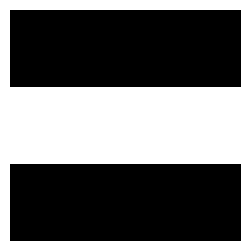

In [26]:
matrix = np.array(
    [[1, 1, 1], 
     [0, 0, 0], 
     [1, 1, 1]])
draw(matrix, figsize=3)

Here, there are two rows of walls on the top and bottom and a row of empty cells acorss the middle. Of course, this isn't a very interesting puzzle.

---
### Exercise 1

For our algorithms, we will always start with a full matrix of ones (grid of walls). We can begin by just removing some random subset of walls (of course there is little chance this is actually a maze / labyrinth). Fill in the blanks to generate this random matirx.  


In [86]:
def random_removal(size, seed=None):
    """generates a random matrix of ones and zeros

    Args:
        size (int): size of a dimension of the matrix
        seed (int, optional): seed for random generation. Defaults to None.

    Returns:
        2d numpy array: matrix of 1 and 0
    """

    np.random.seed(seed)

    matrix = np.ones((size, size)) # initialize a grid of walls

    for i in range(____): # loop through rows
        for j in range(____): # loop thrgouh columns
            if np.random.random() > ____: # 50 % chance of creating an empty cell
                matrix[i, j] = ____ # make the cell empty
    
    return matrix

If done properly, the drawn matrix below will look like

<img src="./random matrix.png" alt="random matrix" width="200"/>

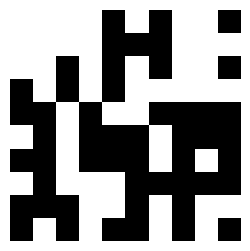

In [87]:
draw(random_removal(10, 0), 3)

Of course, there are more elegant solutions. One is below. (It won't generate the same matrix)

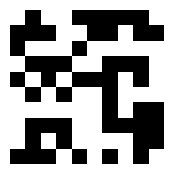

In [90]:
draw(np.random.randint(2, size=(10, 10)), figsize=2)

Now we create a maze. We will define a maze as a matrix of cells with two types of entries - empty and wall - such that there is a path (of empty cells) from an entrance to an exit and the path contains some unused branches (so it isn't a labyrinth). It would also be nice if this maze was interesting enough to be "fun" for the maze solver.

# TODO: describe the nature of these cells

# TODO: Insert small example here

In [120]:
def recursive_backtracking(size):
    maze = np.ones((size*2+1, size*2+1))
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    def recurse(x, y, maze):
        np.random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0

                recurse(nx, ny, maze)
        else:
            return maze
    
    maze = recurse(x, y, maze)

    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

In [112]:
def backtracking(size):
    maze = np.ones((size*2+1, size*2+1))

    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    stack = [(x, y)]
    while stack:
        x, y = stack[-1]

        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        np.random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < size and ny < size and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

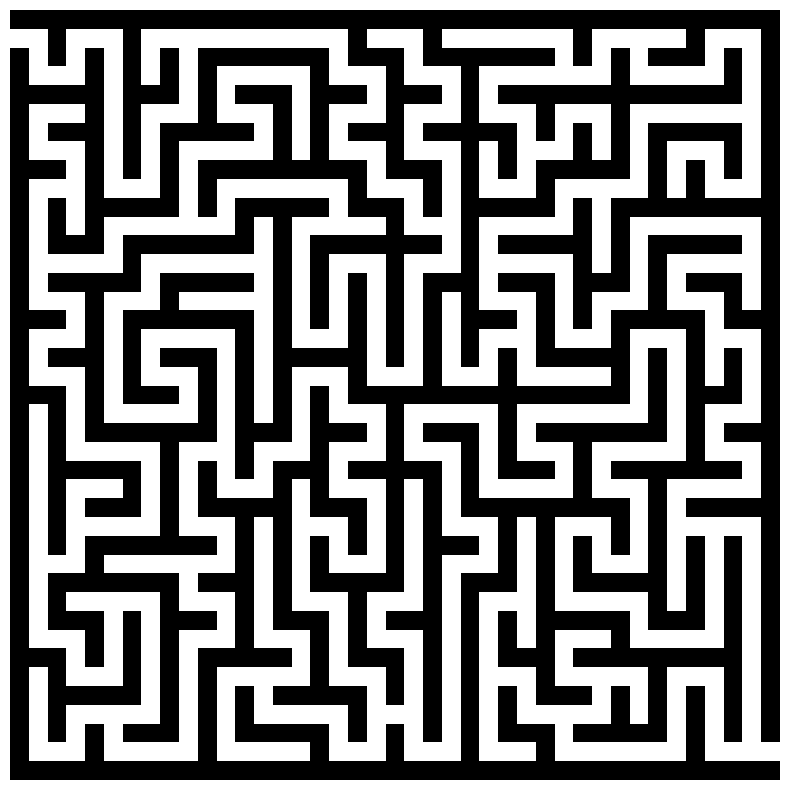

In [126]:
# draw(backtracking(20))
draw(recursive_backtracking(20))

In [129]:
%timeit backtracking(20)



700 µs ± 7.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [130]:
%timeit recursive_backtracking(20)

448 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


---
## Solutions
### Exercise 1

```python
for i in range(matrix.shape[0]): # loop through rows
    for j in range(matrix.shape[1]): # loop thrgouh columns
        if np.random.random() > .5: # 50 % chance of creating an empty cell
            matrix[i, j] = 0 # make the cell empty
```